In [1]:
import warnings
warnings.filterwarnings('ignore')

import os

PROJ_ROOT = os.pardir

TRAIN_DATA = os.path.join(PROJ_ROOT, "data", "raw", "train.csv")
TEST_DATA = os.path.join(PROJ_ROOT, "data", "raw", "test.csv")

import sys
sys.path.append(os.path.join(PROJ_ROOT, "src"))

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from IPython.display import display


from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
PATH = os.path.join(PROJ_ROOT, "data", "raw/")

PATH


from sklearn.metrics import accuracy_score, r2_score

from sklearn.model_selection import train_test_split

In [4]:
!ls {PATH} 

bodyfat-test.csv             kaggle_solution_template.csv
bodyfat-train.csv


In [7]:
train_df = pd.read_csv(f"{PATH}/bodyfat-train.csv")
test_df = pd.read_csv(f"{PATH}/bodyfat-test.csv")

In [8]:
train_df.describe()

,Body fat (%),Age (years),Weight (lbs),Height (inches),Neck (cm),Chest (cm),Abdomen (cm),Hip (cm),Thigh (cm),Knee (cm),Ankle (cm),Biceps (cm),Forearm (cm),Wrist (cm)
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,18.977612,44.631841,178.370398,70.009950,37.992537,100.500000,92.392537,99.885572,59.407960,38.574627,23.060697,32.197015,28.645771,18.216418
std,8.391314,12.462896,30.489848,3.859877,2.549803,8.508314,10.973468,7.399307,5.503221,2.481875,1.647027,3.196043,2.080167,0.935189
min,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,22.000000,15.800000
25%,12.500000,35.000000,157.000000,68.250000,36.300000,94.000000,84.400000,95.500000,56.000000,36.900000,22.000000,30.000000,27.200000,17.600000
50%,19.200000,43.000000,176.000000,70.000000,38.000000,99.600000,90.900000,99.300000,58.900000,38.600000,22.800000,31.900000,28.700000,18.300000
75%,24.700000,54.000000,198.000000,72.250000,39.600000,105.300000,99.100000,103.700000,63.100000,39.900000,24.000000,34.600000,30.100000,18.800000
max,47.500000,81.000000,363.150000,77.500000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [75]:
target = train_df["Body fat (%)"]

In [87]:
train_X, test_X, train_y, test_y = train_test_split(train_df[columns_to_train], target)

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
model = RandomForestRegressor()

In [90]:
model.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [91]:
r2_score(model.predict(test_X), test_y)

0.5661522824171268

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

In [82]:
model = GradientBoostingRegressor()

In [22]:
from sklearn.metrics import mean_absolute_error

In [85]:
mean_absolute_error(model.predict(test_X), test_y)

4.031380632710187

In [30]:
plt

<module 'matplotlib.pyplot' from '/Users/manish/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/matplotlib/pyplot.py'>

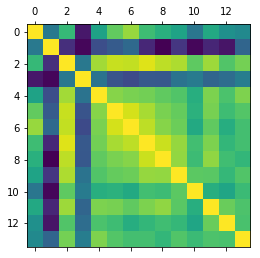

In [31]:
plt.matshow(train_df.corr())

In [61]:
train_df.corr()["Body fat (%)"]

Body fat (%)              1.000000
Age (years)               0.281098
Weight (lbs)              0.604166
Height (inches)          -0.123521
Neck (cm)                 0.487892
Chest (cm)                0.712247
Abdomen (cm)              0.812182
Hip (cm)                  0.628160
Thigh (cm)                0.560525
Knee (cm)                 0.493188
Ankle (cm)                0.269730
Biceps (cm)               0.521717
Forearm (cm)              0.400249
Wrist (cm)                0.366006
height_to_weight_ratio   -0.699267
chest_to_hip_ratio        0.312930
age_to_weight_ratio      -0.073027
knee_to_thigh_ratio      -0.368292
Name: Body fat (%), dtype: float64

In [38]:
train_df["height_to_weight_ratio"] = train_df["Height (inches)"] / train_df["Weight (lbs)"]

In [39]:
train_df["chest_to_hip_ratio"] = train_df["Chest (cm)"] / train_df["Hip (cm)"]

In [40]:
train_df["age_to_weight_ratio"] = train_df["Age (years)"] / train_df["Weight (lbs)"]

In [53]:
train_df["knee_to_thigh_ratio"] = train_df["Knee (cm)"] / train_df["Thigh (cm)"]

In [72]:
train_df["chest_to_abdomen_ratio"] = train_df["Chest (cm)"] / train_df["Abdomen (cm)"]

In [86]:
columns_to_train = ["height_to_weight_ratio", "chest_to_hip_ratio", "age_to_weight_ratio",
                    "knee_to_thigh_ratio", "chest_to_abdomen_ratio", "Height (inches)", "Age (years)",
                    "Abdomen (cm)", "Neck (cm)"
                   ]